In [1]:
# Simple Optimal Growth Model for Disrete DP
# making a class which prepares the instances for DiscreteDP 

import numpy as np

class SimpleOG(object):
    
    def __init__(self, B = 10, M = 5 , alpha = 0.5, beta = 0.9):
        
        self.B ,self.M ,self.alpha, self.beta = B,M,alpha,beta
        self.n = B+M+1
        self.m = M+1
        
        self.R = np.empty((self.n, self.m))
        self.Q = np.zeros((self.n, self.m, self.n))
        
        self.populate_Q()
        self.populate_R()
        
    def u(self, c):
        return c**self.alpha
    
    def populate_R(self):
        for i in range(self.n):
            for j in range(self.m):
                if i >= j:
                    self.R[i][j] = self.u(i - j)
                else:
                    self.R[i][j] = -np.inf
    
    def populate_Q(self):
            for a in range(self.m):
                self.Q[:, a, a:(a + self.B + 1)] = 1.0 / (self.B +1)

In [2]:
g = SimpleOG()

In [3]:
# Using DiscreteDP
#DiscreteDP  needs three arguments, R, Q, beta

import quantecon as qe

ddp = qe.markov.DiscreteDP(g.R, g.Q, g.beta)

In [4]:
# solving DP by using DiscreetDP

results = ddp.solve(method = "policy_iteration")

In [9]:
results

       mc: Markov chain with transition matrix 
P = 
[[ 0.09090909  0.09090909  0.09090909  0.09090909  0.09090909  0.09090909
   0.09090909  0.09090909  0.09090909  0.09090909  0.09090909  0.          0.
   0.          0.          0.        ]
 [ 0.09090909  0.09090909  0.09090909  0.09090909  0.09090909  0.09090909
   0.09090909  0.09090909  0.09090909  0.09090909  0.09090909  0.          0.
   0.          0.          0.        ]
 [ 0.09090909  0.09090909  0.09090909  0.09090909  0.09090909  0.09090909
   0.09090909  0.09090909  0.09090909  0.09090909  0.09090909  0.          0.
   0.          0.          0.        ]
 [ 0.09090909  0.09090909  0.09090909  0.09090909  0.09090909  0.09090909
   0.09090909  0.09090909  0.09090909  0.09090909  0.09090909  0.          0.
   0.          0.          0.        ]
 [ 0.          0.09090909  0.09090909  0.09090909  0.09090909  0.09090909
   0.09090909  0.09090909  0.09090909  0.09090909  0.09090909  0.09090909
   0.          0.          0.      

In [8]:
ddp.compute_greedy(results.v)

array([0, 0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 5, 5, 5, 5])

In [15]:
# check the elements in results

dir(results)

['max_iter', 'mc', 'method', 'num_iter', 'sigma', 'v']

In [19]:
print "The maximum number of iterations is" , results.max_iter
print "The transition matrix taken when following the optimal policy is" ,results.mc
print "The method used here to solve this problem is ", results.method
print "The number of iterations taken here is ", results.num_iter
print "The optimal value function is ", results.v
print "The optimal policy function is ", results.sigma

The maximum number of iterations is 250
The transition matrix taken when following the optimal policy is <bound method MarkovChain.__repr__ of Markov chain with transition matrix 
P = 
[[ 0.09090909  0.09090909  0.09090909  0.09090909  0.09090909  0.09090909
   0.09090909  0.09090909  0.09090909  0.09090909  0.09090909  0.          0.
   0.          0.          0.        ]
 [ 0.09090909  0.09090909  0.09090909  0.09090909  0.09090909  0.09090909
   0.09090909  0.09090909  0.09090909  0.09090909  0.09090909  0.          0.
   0.          0.          0.        ]
 [ 0.09090909  0.09090909  0.09090909  0.09090909  0.09090909  0.09090909
   0.09090909  0.09090909  0.09090909  0.09090909  0.09090909  0.          0.
   0.          0.          0.        ]
 [ 0.09090909  0.09090909  0.09090909  0.09090909  0.09090909  0.09090909
   0.09090909  0.09090909  0.09090909  0.09090909  0.09090909  0.          0.
   0.          0.          0.        ]
 [ 0.          0.09090909  0.09090909  0.09090909  

In [20]:
# optimal value function は、各stateが初期状態の時に達成しうる無限期間での最大化された期待効用
#optimal policy functionは、各stateに対して取るべき次の行動を表示。例えば、state7に対しては、indexの7番目を見て、action2を取る。

In [21]:
# and mc is MarkovChain instance
#so, you can calculate the stationary distribution for P
# optimal policyをとっている時に、stationary_distributionに従って初期状態を決定すれば、以降取る状態の分布はstationary_distributionに従う
results.mc.stationary_distributions


array([[ 0.01732187,  0.04121063,  0.05773956,  0.07426848,  0.08095823,
         0.09090909,  0.09090909,  0.09090909,  0.09090909,  0.09090909,
         0.09090909,  0.07358722,  0.04969846,  0.03316953,  0.01664061,
         0.00995086]])

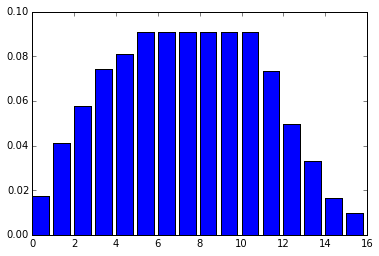

In [42]:
# the graph for this distribution
import matplotlib.pyplot as plt
% matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
h = results.mc.stationary_distributions
ax.bar(np.arange(16), h[0])
plt.show()

In [22]:
g.R

array([[ 0.        ,        -inf,        -inf,        -inf,        -inf,
               -inf],
       [ 1.        ,  0.        ,        -inf,        -inf,        -inf,
               -inf],
       [ 1.41421356,  1.        ,  0.        ,        -inf,        -inf,
               -inf],
       [ 1.73205081,  1.41421356,  1.        ,  0.        ,        -inf,
               -inf],
       [ 2.        ,  1.73205081,  1.41421356,  1.        ,  0.        ,
               -inf],
       [ 2.23606798,  2.        ,  1.73205081,  1.41421356,  1.        ,
         0.        ],
       [ 2.44948974,  2.23606798,  2.        ,  1.73205081,  1.41421356,
         1.        ],
       [ 2.64575131,  2.44948974,  2.23606798,  2.        ,  1.73205081,
         1.41421356],
       [ 2.82842712,  2.64575131,  2.44948974,  2.23606798,  2.        ,
         1.73205081],
       [ 3.        ,  2.82842712,  2.64575131,  2.44948974,  2.23606798,
         2.        ],
       [ 3.16227766,  3.        ,  2.82842712,  2.

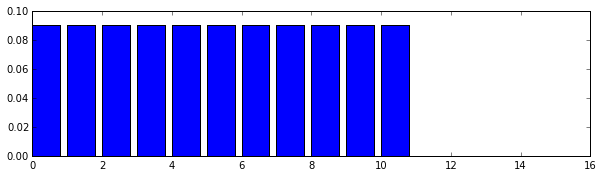

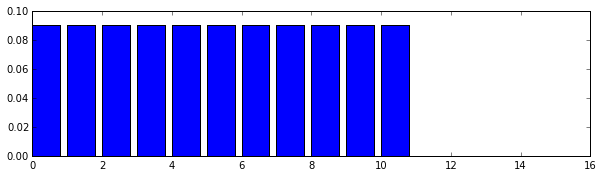

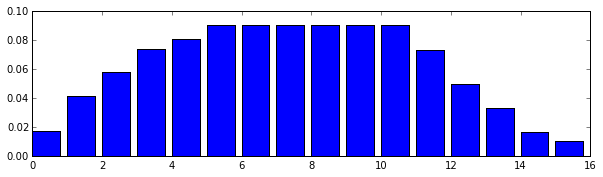

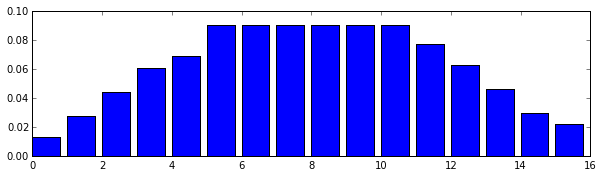

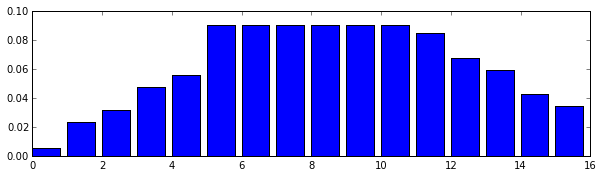

In [57]:
# betaを変えてstationaryを表示してみる(小さいほど近視眼的)
#patientなほど、高いstateを取るようになる
#これは、目先の紅葉が高い消費を抑えて、収入を将来の貯蓄にまわすようになること意味する

import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
i = 1

for beta_2 in [0.05, 0.5, 0.9, 0.95, 0.99]:
    k = SimpleOG(beta = beta_2)
    ddp = qe.markov.DiscreteDP(k.R, k.Q, k.beta)
    results = ddp.solve(method = "policy_iteration")
    f = results.mc.stationary_distributions
    fig = plt.figure(figsize=(10, 15))
    plt.subplot(5,1,i)
    plt.bar(np.arange(16), f[0])
    i +=1
    plt.show()